<a href="https://colab.research.google.com/github/shadi159/Cloud-Computing/blob/main/Copy_of_BigDataPySpark_lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1 - Installation**

In [1]:
# Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download the latest Apache Spark version
!wget -q https://archive.apache.org/dist/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
!tar xf spark-3.4.1-bin-hadoop3.tgz

# Install findspark to connect Python with Spark
!pip install -q findspark


# **Step 2 - Environment Setup**

In [2]:
# Import the os module to interact with the operating system
import os
# Import findspark to locate the Spark installation
import findspark

# Set the environment variable for Java home directory (required for Spark to run)
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# Set the environment variable for Spark home directory to the downloaded Spark path
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"

# Initialize findspark to make pyspark importable within Python
findspark.init()


# **Step 3 - Create SparkSession**

In [3]:
# Import SparkSession class from PySpark SQL module
from pyspark.sql import SparkSession

# Create a SparkSession object, which is the entry point to use Spark functionality
  # Set the name of the Spark application to be "Big Data Example"
  # Create a new SparkSession or return an existing one
spark = SparkSession.builder.appName("Big Data Example").getOrCreate()

# **Step 4 – Continue with DataFrame operations**

In [4]:
# Define a list of tuples, each containing a name and a price
data = [("Tal", 120), ("Uri", 90), ("Dina", 150)]
# Define the column names for the DataFrame
columns = ["name", "price"]
# Create a DataFrame from the data and column names using the SparkSession
df = spark.createDataFrame(data, columns)
# Filter the DataFrame to include only rows where the price is greater than 100
df.filter(df["price"] > 100).show()


+----+-----+
|name|price|
+----+-----+
| Tal|  120|
|Dina|  150|
+----+-----+



# **Real Dataset Example of Amazon Reviews**

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datafiniti/consumer-reviews-of-amazon-products")

print("Path to dataset files:", path)

100%|██████████| 16.3M/16.3M [00:00<00:00, 95.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/datafiniti/consumer-reviews-of-amazon-products/versions/5


In [9]:
df = spark.read.csv("/kaggle/input/consumer-reviews-of-amazon-products", header=True, inferSchema=True)
df.printSchema()
df.show(50)

AnalysisException: [PATH_NOT_FOUND] Path does not exist: file:/kaggle/input/consumer-reviews-of-amazon-products.

In [ ]:
# Filter positive reviews
positive_reviews = df.filter(df["`reviews.rating`"] >= 4)

# Show examples of positive reviews
positive_reviews.select("`reviews.text`", "`reviews.rating`").show(50, truncate=False)


In [ ]:
# Count how many reviews there are per numerical rating
df.filter(df["`reviews.rating`"] >= 0).groupBy("`reviews.rating`").count().orderBy("count", ascending=False).show()

# **Map Reduce Example**

In [ ]:
logs = [
    "192.168.1.10 - - [10/May/2025:13:00] GET /index.html",
    "172.16.0.5 - - [10/May/2025:13:01] GET /contact.html",
    "192.168.1.10 - - [10/May/2025:13:02] GET /products.html",
    "10.0.0.1 - - [10/May/2025:13:02] GET /index.html",
    "192.168.1.10 - - [10/May/2025:13:03] GET /about.html"
]

In [ ]:
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder \
    .appName("IP Visit Count") \
    .getOrCreate()

# Create RDD (Resilient Distributed Dataset) from the list of logs
rdd = spark.sparkContext.parallelize(logs)

# Map step: extract the IP and map each one to (IP, 1)
ip_counts = rdd.map(lambda line: (line.split()[0], 1))

# Reduce step: sum all counts per IP
result = ip_counts.reduceByKey(lambda a, b: a + b)

# Collect the results to the driver and print
for ip, count in result.collect():
    print(f"{ip} visited {count} times")

# Stop the Spark session
spark.stop()


In [ ]:
add = lambda x, y: x + y
print(add(2, 3))

In [ ]:
from pyspark.sql import SparkSession

# Start SparkSession
spark = SparkSession.builder.appName("RDD Example").getOrCreate()

rdd = spark.sparkContext.parallelize([("apple", 1), ("banana", 1), ("apple", 1)])
result = rdd.reduceByKey(lambda a, b: a + b)
print(result.collect())


# **Word Count with MapReduce in PySpark:**

In [ ]:
from pyspark.sql import SparkSession

# Start Spark session
spark = SparkSession.builder \
    .appName("Big Data Word Count with MapReduce") \
    .getOrCreate()

# Load text data (simulating a large dataset with parallelize)
text = [
    "Big data is transforming the world",
    "Apache Spark is fast and powerful",
    "Big data requires scalable tools",
    "Spark is designed for big data processing"
]

# Create RDD from text lines
rdd = spark.sparkContext.parallelize(text)

# MapReduce steps:
# Step 1: Split each line into words
words = rdd.flatMap(lambda line: line.lower().split())

# Step 2: Map each word to (word, 1)
word_pairs = words.map(lambda word: (word, 1))

# Step 3: Reduce by key (sum counts for each word)
word_counts = word_pairs.reduceByKey(lambda a, b: a + b)

# Collect and display the results
for word, count in word_counts.collect():
    print(f"{word}: {count}")


# **Map Reduce analysis Big Data**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datafiniti/consumer-reviews-of-amazon-products")

print("Path to dataset files:", path)

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import isnull # Import the isnull function

df = spark.read.csv("/kaggle/input/consumer-reviews-of-amazon-products", header=True, inferSchema=True)
# Select the review column and filter out rows where 'reviews.text' is null
df_clean = df.select(col("`reviews.text`").alias("review")).filter(col("review").isNotNull())
# Create RDD from text lines
rdd = df_clean.select("review").rdd.map(lambda row: row["review"])
# MapReduce steps:
# Step 1: Split each line into words
words = rdd.flatMap(lambda line: line.lower().split())

# Step 2: Map each word to (word, 1)
word_pairs = words.map(lambda word: (word, 1))

# Step 3: Reduce by key (sum counts for each word)
word_counts = word_pairs.reduceByKey(lambda a, b: a + b)

# Collect and display the results
for word, count in word_counts.collect():
    print(f"{word}: {count}")


--- Task 6: Processing Your IoT CSV File ---
Raw Data Preview:
+-------------------+-----------------------------------------------------------------------------------------------------+
|created_at         |value                                                                                                |
+-------------------+-----------------------------------------------------------------------------------------------------+
|2025-12-06 08:10:07|{"temperature": 21.30, "humidity": 36.00, "soil": 100, "tempThreshold": 30.00, "humThreshold": 60.00}|
|2025-12-06 08:20:07|{"temperature": 22.60, "humidity": 31.00, "soil": 100, "tempThreshold": 30.00, "humThreshold": 60.00}|
|2025-12-06 08:58:47|{"temperature": 23.00, "humidity": 35.00, "soil": 58}                                                |
+-------------------+-----------------------------------------------------------------------------------------------------+
only showing top 3 rows


 FINAL RESULTS (MapReduce Analysis)
Parame

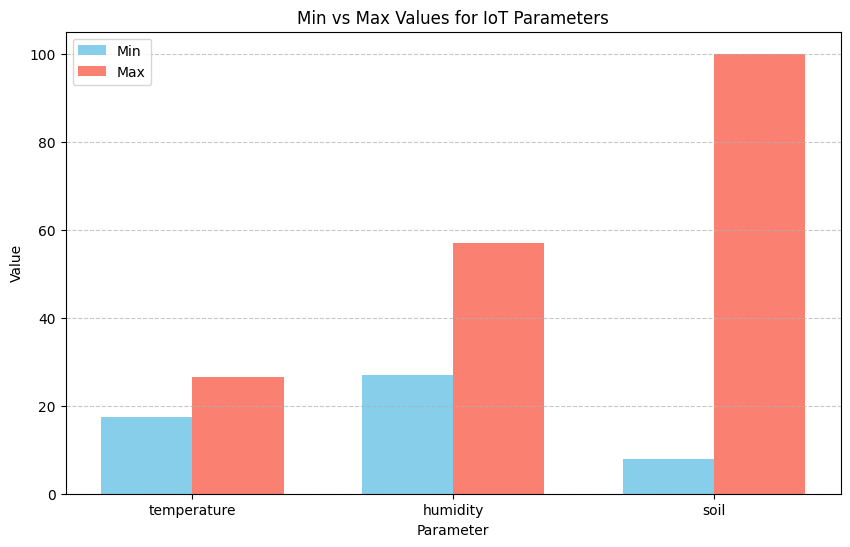

In [10]:
# ==========================================
# TASK 6: CUSTOM IOT DATA ANALYSIS (MapReduce)
# ==========================================
print("\n--- Task 6: Processing Your IoT CSV File ---")

import json

# 1. LOAD THE DATA
# Make sure to upload your file 'csv_json-20251229-2143.csv' to the Colab files section!
file_name = "csv_json-20251229-2143.csv"

# Read CSV (handling the quoted JSON string automatically)
df_custom = spark.read.csv(file_name, header=True, inferSchema=True, escape='"', multiLine=True)

# Show raw data to verify
print("Raw Data Preview:")
df_custom.select("created_at", "value").show(3, truncate=False)

# 2. DEFINE MAP & REDUCE FUNCTIONS

def parse_and_map(row):
    """
    MAP STEP:
    1. Parse the JSON string from the 'value' column.
    2. Emit a key-value pair for each parameter: (ParameterName, Value)
    """
    try:
        # Get the JSON string
        json_str = row['value']
        if not json_str:
            return []

        # Parse JSON
        data = json.loads(json_str)

        # We want to track these specific parameters
        target_keys = ['temperature', 'humidity', 'soil']

        output = []
        for key in target_keys:
            if key in data:
                # Emit (Key, Value) -> e.g., ('temperature', 20.3)
                output.append((key, float(data[key])))
        return output
    except Exception as e:
        return []

def reduce_min_max(acc, value):
    """
    REDUCE STEP:
    Compares the current accumulated (Min, Max) with a new value.
    acc: A tuple of (current_min, current_max)
    value: The new number to check
    """
    # If acc is just a number (first step), convert it to (min, max)
    if isinstance(acc, float) or isinstance(acc, int):
        acc = (acc, acc)

    current_min, current_max = acc

    # If value is a tuple (from a previous reduce), unpack it
    if isinstance(value, tuple):
        val_min, val_max = value
        new_min = min(current_min, val_min)
        new_max = max(current_max, val_max)
    else:
        # Value is just a number
        new_min = min(current_min, value)
        new_max = max(current_max, value)

    return (new_min, new_max)

# 3. EXECUTE THE PIPELINE

# Convert DataFrame to RDD
rdd_rows = df_custom.rdd

# FLATMAP: Parse JSON and explode into many (Metric, Value) pairs
# Input: Row(...)
# Output: [('temperature', 20.3), ('humidity', 48.0), ...]
mapped_rdd = rdd_rows.flatMap(parse_and_map)

# MAP 2: Prepare for reduction by creating initial (Min, Max) structure
# Input: ('temperature', 20.3)
# Output: ('temperature', (20.3, 20.3))
formatted_rdd = mapped_rdd.map(lambda x: (x[0], (x[1], x[1])))

# REDUCE: Aggregate by Key to find global Min/Max
# Input: ('temperature', (20.3, 20.3)), ('temperature', (22.0, 22.0))
# Output: ('temperature', (20.3, 22.0))
result_rdd = formatted_rdd.reduceByKey(lambda a, b: (min(a[0], b[0]), max(a[1], b[1])))

# 4. DISPLAY RESULTS
results = result_rdd.collect()

print("\n" + "="*40)
print(" FINAL RESULTS (MapReduce Analysis)")
print("="*40)
print(f"{'Parameter':<15} | {'Min Value':<10} | {'Max Value':<10}")
print("-" * 40)

param_data = []
for param, (min_val, max_val) in results:
    print(f"{param:<15} | {min_val:<10} | {max_val:<10}")
    param_data.append({"Parameter": param, "Min": min_val, "Max": max_val})

# 5. GENERATE GRAPHS
import matplotlib.pyplot as plt
import pandas as pd

# Convert to Pandas for plotting
pdf_res = pd.DataFrame(param_data)

plt.figure(figsize=(10, 6))
x = range(len(pdf_res))
width = 0.35

plt.bar([i - width/2 for i in x], pdf_res['Min'], width, label='Min', color='skyblue')
plt.bar([i + width/2 for i in x], pdf_res['Max'], width, label='Max', color='salmon')

plt.xlabel('Parameter')
plt.ylabel('Value')
plt.title('Min vs Max Values for IoT Parameters')
plt.xticks(x, pdf_res['Parameter'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


--- Task 7: Finding Most Frequent Values (Mode) ---

Parameter       | Most Common Value    | Appearances    
temperature     | 22.5                 | 103            
humidity        | 42.0                 | 297            
soil            | 37.0                 | 102            

Top 10 Most Common Temperatures (for graph):
[(22.5, 103), (20.3, 100), (19.5, 97), (21.9, 95), (21.5, 90), (21.7, 82), (20.0, 82), (20.8, 75), (20.5, 74), (20.7, 70)]


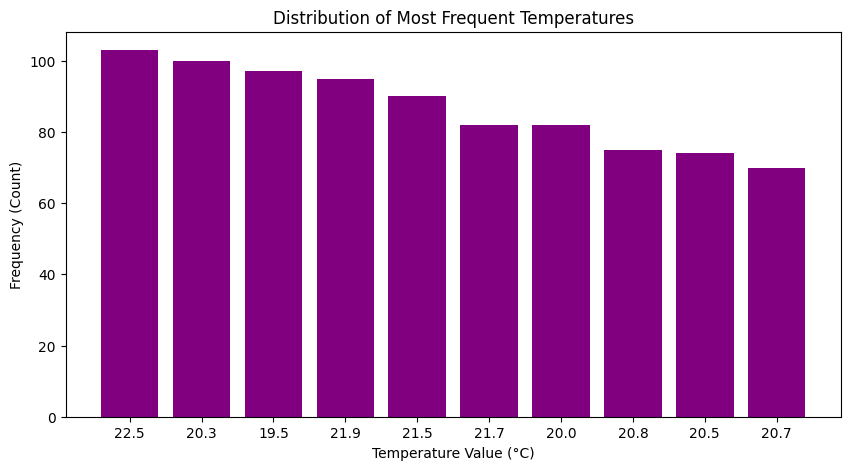

In [11]:
# ==========================================
# TASK 7: FINDING THE MODE (MOST FREQUENT VALUE)
# ==========================================
import json

print("\n--- Task 7: Finding Most Frequent Values (Mode) ---")

# 1. LOAD DATA
file_name = "csv_json-20251229-2143.csv"
df_mode = spark.read.csv(file_name, header=True, inferSchema=True, escape='"', multiLine=True)

# 2. DEFINE MAP & REDUCE FUNCTIONS

def map_value_counts(row):
    """
    MAP 1: Extract (Parameter, Value) pairs
    Output: [ (('temperature', 20.5), 1), (('humidity', 60), 1) ... ]
    """
    try:
        json_str = row['value']
        if not json_str: return []
        data = json.loads(json_str)

        output = []
        for key in ['temperature', 'humidity', 'soil']:
            if key in data:
                # Key is a tuple: (metric_name, metric_value)
                # Value is 1 (to be counted)
                output.append( ((key, float(data[key])), 1) )
        return output
    except:
        return []

def reduce_sum_counts(a, b):
    """ REDUCE 1: Simple Sum """
    return a + b

def reduce_find_mode(acc, curr):
    """
    REDUCE 2: Compare counts and keep the winner
    Input format: (Value, Count)
    """
    # acc is (best_val, best_count)
    # curr is (current_val, current_count)
    if curr[1] > acc[1]:
        return curr # New winner
    else:
        return acc # Keep existing

# 3. EXECUTE PIPELINE

# Step A: Count occurrences of every specific value
# Result: ((('temperature', 20.3), 50), (('temperature', 21.0), 10)...)
value_counts_rdd = df_mode.rdd.flatMap(map_value_counts) \
                             .reduceByKey(reduce_sum_counts)

# Step B: Re-map to group by Parameter only
# Input: (('temperature', 20.3), 50)
# Output: ('temperature', (20.3, 50))
grouped_rdd = value_counts_rdd.map(lambda x: (x[0][0], (x[0][1], x[1])))

# Step C: Find the entry with the MAX count for each parameter
result_rdd = grouped_rdd.reduceByKey(reduce_find_mode)

# 4. SHOW RESULTS
results = result_rdd.collect()

print("\n" + "="*60)
print(f"{'Parameter':<15} | {'Most Common Value':<20} | {'Appearances':<15}")
print("="*60)

for param, (mode_val, count) in results:
    print(f"{param:<15} | {str(mode_val):<20} | {count:<15}")

# 5. VISUALIZATION (Top 5 Values for Temperature)
# To verify, let's plot the frequency distribution of the top 10 temps
top_temps = value_counts_rdd.filter(lambda x: x[0][0] == 'temperature') \
                            .map(lambda x: (x[0][1], x[1])) \
                            .takeOrdered(10, key=lambda x: -x[1])

print("\nTop 10 Most Common Temperatures (for graph):")
print(top_temps)

import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for plot
labels = [str(x[0]) for x in top_temps]
counts = [x[1] for x in top_temps]

plt.figure(figsize=(10, 5))
plt.bar(labels, counts, color='purple')
plt.xlabel('Temperature Value (°C)')
plt.ylabel('Frequency (Count)')
plt.title('Distribution of Most Frequent Temperatures')
plt.show()